<!-- dom:TITLE: Data Analysis and Machine Learning: Getting started, our first data and Machine Learning encounters -->
# Esempi di Minimizzazione attraveso la discesa del gradiente 
<!-- dom:AUTHOR: Morten Hjorth-Jensen at Department of Physics, University of Oslo & Department of Physics and Astronomy and National Superconducting Cyclotron Laboratory, Michigan State University 
Note adattate dal corso di  **Morten Hjorth-Jensen**, Dipartimento di fisica (Università di Oslo e Michigan State University).
-->
<!-- Author: -->  
<!-- dom:AUTHOR: Carlo Barbieri at Department of Physics, Università Statale di Milano -->
<!-- Author: -->  

C. Barbieri, $\qquad$ **Novembre 2021**.


Metodi di discesa del gradiente (Gradient Descent) e discesa del gradiente stocastica (Stochastic Gradient Descent) in funzioni di molti parametri.

Questo Notebook contiene:

+ Esempi di discesa del granidente con minimizzazione lineare e stocati gradient descent.

+ Un esercizio **da risolvere** per una funzione complessa e non convessa

+ Ulteriori discussioni sull'implementazione della velocità di apprendimento in SGD (che vedremo anche a lezione).


### Testi di riferimento

Il materiale discusso in queste lezioni è estratto da: [Aurelien Geron's chapter 4](https://gitlab.com/craolus/MachineLearning-con-applicazioni/-/blob/master/Documenti/Monografie/TensorflowML.pdf) e [Murphy sections 8.3 and 8.5](https://gitlab.com/craolus/MachineLearning-con-applicazioni/-/blob/master/Documenti/Monografie/MachineLearningMurphy.pdf) 



## Ottimizzazione come elemento centrale degli algoritmi di apprendimento automatico

La stragrance maggioranza dei problemi in machine learning parte da un dataset $\mathcal D=\{({\bf x}_i,y_i\}$,
un modello $f({\bf x};\{\theta\})$ che è funzione di un insieme di parametri $\{\theta\}$ ed una funzione di costo $C(X,{\vec y}, f(\{\theta\}))$ che permette di giudicare la capacità di  $f({\bf x};\{\theta\})$ nello spiegare le i campionamenti $\mathcal D$. 
Il modello vine ottimizzato (o '_allenato_') cercandi i valori di $\{\theta\}$ che minimizzano la funzione di costo. 
Nel caso ideale si vorrebbe si vorrebbe poter ottenere la soluzione in maniera analitica ma questo è quasi mai possibile, quindi è necessario ricorrere a metodi approssomati e/o numerici per trovare il minimo. 



## Steepest descent

The basic idea of gradient descent is
that a function $F(\mathbf{x})$, 
$\mathbf{x} \equiv (x_1,\cdots,x_n)$, decreases fastest if one goes from $\bf {x}$ in the
direction of the negative gradient $-\nabla F(\mathbf{x})$.

It can be shown that if

$$
\mathbf{x}_{k+1} = \mathbf{x}_k - \gamma_k \nabla F(\mathbf{x}_k),
$$

with $\gamma_k > 0$.

For $\gamma_k$ small enough, then $F(\mathbf{x}_{k+1}) \leq
F(\mathbf{x}_k)$. This means that for a sufficiently small $\gamma_k$
we are always moving towards smaller function values, i.e a minimum.

<!-- !split  -->
## More on Steepest descent

The previous observation is the basis of the method of steepest
descent, which is also referred to as just gradient descent (GD). One
starts with an initial guess $\mathbf{x}_0$ for a minimum of $F$ and
computes new approximations according to

$$
\mathbf{x}_{k+1} = \mathbf{x}_k - \gamma_k \nabla F(\mathbf{x}_k), \ \ k \geq 0.
$$

The parameter $\gamma_k$ is often referred to as the step length or
the learning rate within the context of Machine Learning.

<!-- !split  -->
## The ideal

Ideally the sequence $\{\mathbf{x}_k \}_{k=0}$ converges to a global
minimum of the function $F$. In general we do not know if we are in a
global or local minimum. In the special case when $F$ is a convex
function, all local minima are also global minima, so in this case
gradient descent can converge to the global solution. The advantage of
this scheme is that it is conceptually simple and straightforward to
implement. However, the method in this form has some severe
limitations:

In machine learing we are often faced with non-convex high dimensional
cost functions with many local minima. Since GD is deterministic we
will get stuck in a local minimum, if the method converges, unless we
have a very good intial guess. This also implies that the scheme is
sensitive to the chosen initial condition.

Note that the gradient is a function of $\mathbf{x} =
(x_1,\cdots,x_n)$ which makes it expensive to compute numerically.


<!-- !split  -->
## The sensitiveness of the gradient descent

The gradient descent method 
is sensitive to the choice of learning rate $\gamma_k$. This is due
to the fact that we are only guaranteed that $F(\mathbf{x}_{k+1}) \leq
F(\mathbf{x}_k)$ for sufficiently small $\gamma_k$. The problem is to
determine an optimal learning rate. If the learning rate is chosen too
small the method will take a long time to converge and if it is too
large we can experience erratic behavior.

Many of these shortcomings can be alleviated by introducing
randomness. One such method is that of Stochastic Gradient Descent
(SGD), see further below.



## Steepest descent example

Qui sotto riportiamo un esempio di minimizzazione di discesa lungo il gradiente con una minimizzazione rettilinea (in inglese, '_line minimization_' o '_line search_'). L'approccio consiste nel implemetare la discesa del gradiente secondo

$$
\mathbf{x}_{k+1} = \mathbf{x}_k - \gamma_k \nabla F(\mathbf{x}_k),
$$

ma la velocità di apprendimento $\gamma_k$ viene ottimizzata ogni volta per ottenere la riduzione massima della funzioni che si vuole minimizzare:

$$
\gamma_k = {\rm argmin}_\gamma \; F( \mathbf{x}_k - \gamma \nabla F(\mathbf{x}_k) ) \, .
$$

Iniziamo con il generare due metodi python per calcolare una funzione semplice convessa in 2D ed il suo gradiente:

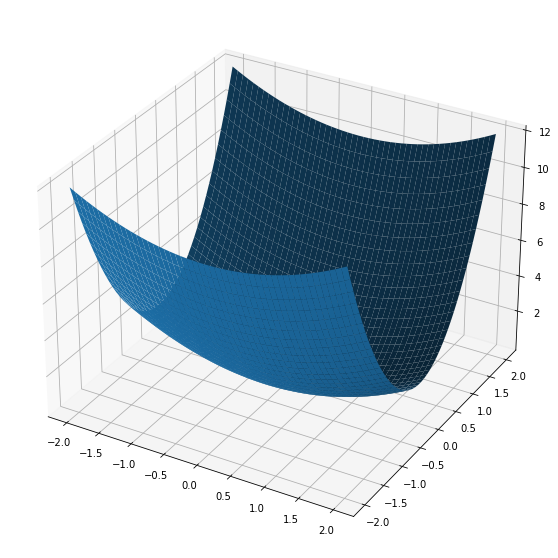

In [1]:
%matplotlib inline

import numpy as np
import numpy.linalg as la      # linear algebra
   
import scipy.optimize as sopt  # funzioni di minimizzazione (per la line search)

import matplotlib.pyplot as pt
from mpl_toolkits.mplot3d import axes3d

def f(x):
    return 0.5*x[0]**2 + 2.5*x[1]**2

def df(x):
    return np.array([x[0], 5*x[1]])

fig = pt.figure(figsize=(14,10))
ax = pt.axes(projection="3d") 

xmesh, ymesh = np.mgrid[-2:2:50j,-2:2:50j]
fmesh = f(np.array([xmesh, ymesh]))
ax.plot_surface(xmesh, ymesh, fmesh)


La mappa a livelli della funzione è la seguente:

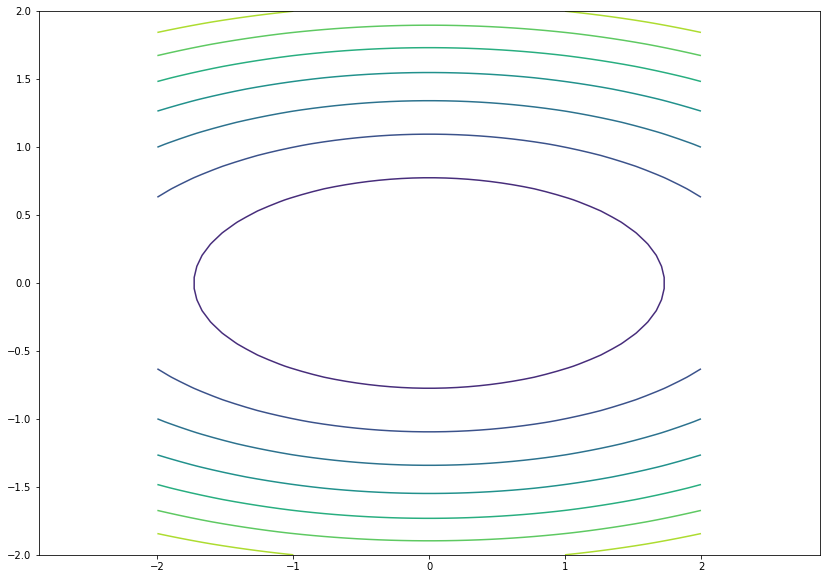

In [2]:
pt.figure(figsize=(14,10))
pt.axis("equal")
pt.contour(xmesh, ymesh, fmesh)  # genrate a contour plot

Il mprimo passo è scegliere un punto da cui partire con al minimizzazione, per esempio:

In [3]:

guesses = [np.array([1.6, .5])]


La caselle seguente prende il punto generato alla fine dell'array guesses (all'inizio conterrà solo il puno di partenza) e usa la line search per generare una nuova approssimazione.  La seconda parte della cella (ri)disecga il grafico a livelli con il percorso di minimizzazione.

Si provi ad eseguire la casella più volte:


Lultimo punto generato è:
[ 0.18690221 -0.02392348]

Il percorso di minimizzazione finora è:
[[ 1.6         0.5       ]
 [ 1.18308193 -0.15143449]
 [ 0.63594535  0.19873292]
 [ 0.47023466 -0.06019004]
 [ 0.25276655  0.07898955]
 [ 0.18690221 -0.02392348]]


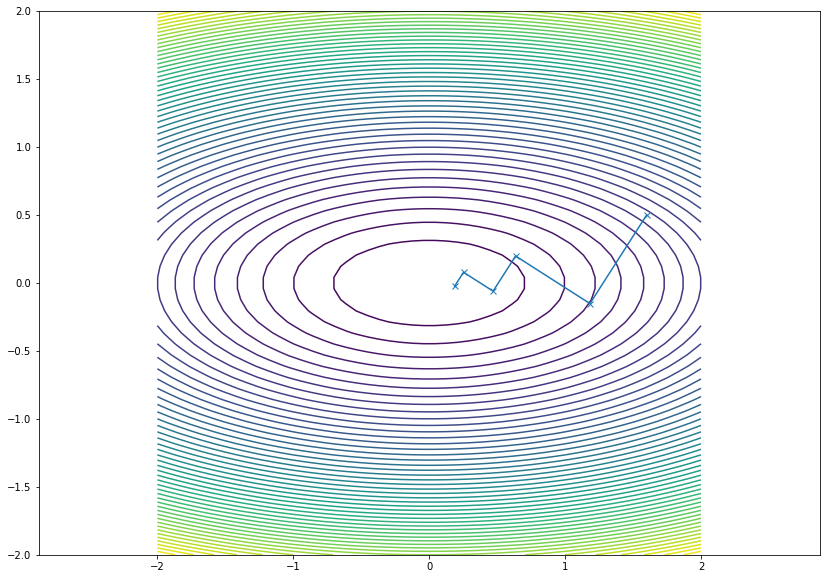

In [8]:
def f1d(alpha):
    return f(x + alpha*s)

x = guesses[-1]
s = -df(x)

alpha_opt = sopt.golden(f1d)
next_guess = x + alpha_opt * s
guesses.append(next_guess)

print('\nL''ultimo punto generato è:')
print(next_guess)

pt.figure(figsize=(14,10))
pt.axis("equal")
pt.contour(xmesh, ymesh, fmesh, 50)
it_array = np.array(guesses)
pt.plot(it_array.T[0], it_array.T[1], "x-")

print('\nIl percorso di minimizzazione finora è:')
print(it_array)


<!-- !split  -->
---
## Revisiting a simple linear regression example

We will use linear regression as a case study for the gradient descent
methods. Linear regression is a great test case for the gradient
descent methods discussed in the lectures since it has several
desirable properties such as:

1. An analytical solution.

2. The gradient can be computed analytically.

3. The cost function is convex which guarantees that gradient descent converges for small enough learning rates

We revisit an example similar to what we had in an earlier notebook. We had a function  of the type

In [ ]:
x = 2*np.random.rand(m,1)
y = 4+3*x+np.random.randn(m,1)

with $x_i \in [0,1] $ is chosen randomly using a uniform distribution. Additionally we have a stochastic noise chosen according to a normal distribution $\cal {N}(0,1)$. 
The linear regression model is given by

$$
h_\beta(x) = \boldsymbol{y} = \beta_0 + \beta_1 x,
$$

such that

$$
\boldsymbol{y}_i = \beta_0 + \beta_1 x_i.
$$

<!-- !split  -->
## Gradient descent example

Let $\mathbf{y} = (y_1,\cdots,y_n)^T$, $\mathbf{\boldsymbol{y}} = (\boldsymbol{y}_1,\cdots,\boldsymbol{y}_n)^T$ and $\beta = (\beta_0, \beta_1)^T$

It is convenient to write $\mathbf{\boldsymbol{y}} = X\beta$ where $X \in \mathbb{R}^{100 \times 2} $ is the design matrix given by (we keep the intercept here)

$$
X \equiv \begin{bmatrix}
1 & x_1  \\
\vdots & \vdots  \\
1 & x_{100} &  \\
\end{bmatrix}.
$$

The cost/loss/risk function is given by (

$$
C(\beta) = \frac{1}{n}||X\beta-\mathbf{y}||_{2}^{2} = \frac{1}{n}\sum_{i=1}^{100}\left[ (\beta_0 + \beta_1 x_i)^2 - 2 y_i (\beta_0 + \beta_1 x_i) + y_i^2\right]
$$

and we want to find $\beta$ such that $C(\beta)$ is minimized.

## The derivative of the cost/loss function

Computing $\partial C(\beta) / \partial \beta_0$ and $\partial C(\beta) / \partial \beta_1$ we can show  that the gradient can be written as

$$
\nabla_{\beta} C(\beta) = \frac{2}{n}\begin{bmatrix} \sum_{i=1}^{100} \left(\beta_0+\beta_1x_i-y_i\right) \\
\sum_{i=1}^{100}\left( x_i (\beta_0+\beta_1x_i)-y_ix_i\right) \\
\end{bmatrix} = \frac{2}{n}X^T(X\beta - \mathbf{y}),
$$

where $X$ is the design matrix defined above.

## The Hessian matrix
The Hessian matrix of $C(\beta)$ is given by

$$
\boldsymbol{H} \equiv \begin{bmatrix}
\frac{\partial^2 C(\beta)}{\partial \beta_0^2} & \frac{\partial^2 C(\beta)}{\partial \beta_0 \partial \beta_1}  \\
\frac{\partial^2 C(\beta)}{\partial \beta_0 \partial \beta_1} & \frac{\partial^2 C(\beta)}{\partial \beta_1^2} &  \\
\end{bmatrix} = \frac{2}{n}X^T X.
$$

This result implies that $C(\beta)$ is a convex function since the matrix $X^T X$ always is positive semi-definite.




## Simple program

We can now write a program that minimizes $C(\beta)$ using the gradient descent method with a constant learning rate $\gamma$ according to

$$
\beta_{k+1} = \beta_k - \gamma \nabla_\beta C(\beta_k), \ k=0,1,\cdots
$$

We can use the expression we computed for the gradient and let use a
$\beta_0$ be chosen randomly and let $\gamma = 0.001$. Stop iterating
when $||\nabla_\beta C(\beta_k) || \leq \epsilon = 10^{-8}$. **Note that the code below does not include the latter stop criterion**.

And finally we can compare our solution for $\beta$ with the analytic result given by 
$\beta= (X^TX)^{-1} X^T \mathbf{y}$.

## Gradient Descent Example

Here our simple example

[0.33605239 4.49486327]
[[3.97645731]
 [2.85784524]]
[[3.97645731]
 [2.85784524]]


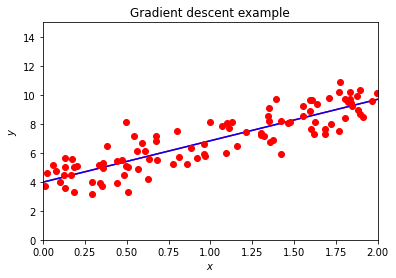

In [36]:

# Importing various packages
from random import random, seed
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import sys

# the number of datapoints
n = 100
x = 2*np.random.rand(n,1)
y = 4+3*x+np.random.randn(n,1)

X = np.c_[np.ones((n,1)), x]
# Hessian matrix
H = (2.0/n)* X.T @ X
# Get the eigenvalues
EigValues, EigVectors = np.linalg.eig(H)
print(EigValues)

beta_linreg = np.linalg.inv(X.T @ X) @ X.T @ y
print(beta_linreg)
beta = np.random.randn(2,1)

eta = 1.0/np.max(EigValues)
Niterations = 1000

for iter in range(Niterations):
    gradient = (2.0/n)*X.T @ (X @ beta-y)
    beta -= eta*gradient

print(beta)
xnew = np.array([[0],[2]])
xbnew = np.c_[np.ones((2,1)), xnew]
ypredict = xbnew.dot(beta)
ypredict2 = xbnew.dot(beta_linreg)
plt.plot(xnew, ypredict, "r-")
plt.plot(xnew, ypredict2, "b-")
plt.plot(x, y ,'ro')
plt.axis([0,2.0,0, 15.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Gradient descent example')
plt.show()

## And a corresponding example using **scikit-learn**

In [38]:
# Importing various packages
from random import random, seed
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor

n = 100
x = 2*np.random.rand(n,1)
y = 4+3*x+np.random.randn(n,1)

X = np.c_[np.ones((n,1)), x]
beta_linreg = np.linalg.inv(X.T @ X) @ (X.T @ y)
print(beta_linreg)
sgdreg = SGDRegressor(max_iter = 50, penalty=None, eta0=0.1)
sgdreg.fit(x,y.ravel())
print(sgdreg.intercept_, sgdreg.coef_)

[[4.06389681]
 [2.99520651]]
[3.99780025] [3.00636281]


<!-- !split  -->
## Gradient descent and Ridge

We have also discussed Ridge regression where the loss function contains a regularized term given by the $L_2$ norm of $\beta$,

$$
C_{\text{ridge}}(\beta) = \frac{1}{n}||X\beta -\mathbf{y}||^2 + \lambda ||\beta||^2, \ \lambda \geq 0.
$$

In order to minimize $C_{\text{ridge}}(\beta)$ using GD we only have adjust the gradient as follows

$$
\nabla_\beta C_{\text{ridge}}(\beta)  = \frac{2}{n}\begin{bmatrix} \sum_{i=1}^{100} \left(\beta_0+\beta_1x_i-y_i\right) \\
\sum_{i=1}^{100}\left( x_i (\beta_0+\beta_1x_i)-y_ix_i\right) \\
\end{bmatrix} + 2\lambda\begin{bmatrix} \beta_0 \\ \beta_1\end{bmatrix} = 2 (X^T(X\beta - \mathbf{y})+\lambda \beta).
$$

We can easily extend our program to minimize $C_{\text{ridge}}(\beta)$ using gradient descent and compare with the analytical solution given by

$$
\beta_{\text{ridge}} = \left(X^T X + \lambda I_{2 \times 2} \right)^{-1} X^T \mathbf{y}.
$$

## Program example for gradient descent with Ridge Regression

[[4.16974093]
 [3.01422919]]
[[3.98485186]
 [3.16776349]]


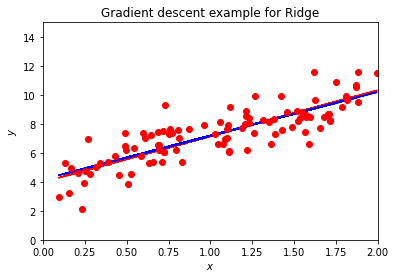

In [39]:
from random import random, seed
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import sys

# the number of datapoints
n = 100
x = 2*np.random.rand(n,1)
y = 4+3*x+np.random.randn(n,1)

X = np.c_[np.ones((n,1)), x]
XT_X = X.T @ X

#Ridge parameter lambda
lmbda  = 0.001
Id = lmbda* np.eye(XT_X.shape[0])

beta_linreg = np.linalg.inv(XT_X+Id) @ X.T @ y
print(beta_linreg)
# Start plain gradient descent
beta = np.random.randn(2,1)

eta = 0.1
Niterations = 100

for iter in range(Niterations):
    gradients = 2.0/n*X.T @ (X @ (beta)-y)+2*lmbda*beta
    beta -= eta*gradients

print(beta)
ypredict = X @ beta
ypredict2 = X @ beta_linreg
plt.plot(x, ypredict, "r-")
plt.plot(x, ypredict2, "b-")
plt.plot(x, y ,'ro')
plt.axis([0,2.0,0, 15.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Gradient descent example for Ridge')
plt.show()

## Using gradient descent methods, limitations

* **Gradient descent (GD) finds local minima of our function**. Since the GD algorithm is deterministic, if it converges, it will converge to a local minimum of our cost/loss/risk function. Because in ML we are often dealing with extremely rugged landscapes with many local minima, this can lead to poor performance.

* **GD is sensitive to initial conditions**. One consequence of the local nature of GD is that initial conditions matter. Depending on where one starts, one will end up at a different local minima. Therefore, it is very important to think about how one initializes the training process. This is true for GD as well as more complicated variants of GD.

* **Gradients are computationally expensive to calculate for large datasets**. In many cases in statistics and ML, the cost/loss/risk function is a sum of terms, with one term for each data point. For example, in linear regression, $E \propto \sum_{i=1}^n (y_i - \mathbf{w}^T\cdot\mathbf{x}_i)^2$; for logistic regression, the square error is replaced by the cross entropy. To calculate the gradient we have to sum over *all* $n$ data points. Doing this at every GD step becomes extremely computationally expensive. An ingenious solution to this, is to calculate the gradients using small subsets of the data called "mini batches". This has the added benefit of introducing stochasticity into our algorithm.

* **GD is very sensitive to choices of learning rates**. GD is extremely sensitive to the choice of learning rates. If the learning rate is very small, the training process take an extremely long time. For larger learning rates, GD can diverge and give poor results. Furthermore, depending on what the local landscape looks like, we have to modify the learning rates to ensure convergence. Ideally, we would *adaptively* choose the learning rates to match the landscape.

* **GD treats all directions in parameter space uniformly.** Another major drawback of GD is that unlike Newton's method, the learning rate for GD is the same in all directions in parameter space. For this reason, the maximum learning rate is set by the behavior of the steepest direction and this can significantly slow down training. Ideally, we would like to take large steps in flat directions and small steps in steep directions. Since we are exploring rugged landscapes where curvatures change, this requires us to keep track of not only the gradient but second derivatives. The ideal scenario would be to calculate the Hessian but this proves to be too computationally expensive. 

* GD can take exponential time to escape saddle points, even with random initialization. As we mentioned, GD is extremely sensitive to initial condition since it determines the particular local minimum GD would eventually reach. However, even with a good initialization scheme, through the introduction of randomness, GD can still take exponential time to escape saddle points.

## Stochastic Gradient Descent

Stochastic gradient descent (SGD) and variants thereof address some of
the shortcomings of the Gradient descent method discussed above.

The underlying idea of SGD comes from the observation that the cost
function, which we want to minimize, can almost always be written as a
sum over $n$ data points $\{\mathbf{x}_i\}_{i=1}^n$,

$$
C(\mathbf{\beta}) = \sum_{i=1}^n c_i(\mathbf{x}_i,
\mathbf{\beta}).
$$

## Computation of gradients

This in turn means that the gradient can be
computed as a sum over $i$-gradients

$$
\nabla_\beta C(\mathbf{\beta}) = \sum_i^n \nabla_\beta c_i(\mathbf{x}_i,
\mathbf{\beta}).
$$

Stochasticity/randomness is introduced by only taking the
gradient on a subset of the data called minibatches.  If there are $n$
data points and the size of each minibatch is $M$, there will be $n/M$
minibatches. We denote these minibatches by $B_k$ where
$k=1,\cdots,n/M$.

## SGD example
As an example, suppose we have $10$ data points $(\mathbf{x}_1,\cdots, \mathbf{x}_{10})$ 
and we choose to have $M=5$ minibathces,
then each minibatch contains two data points. In particular we have
$B_1 = (\mathbf{x}_1,\mathbf{x}_2), \cdots, B_5 =
(\mathbf{x}_9,\mathbf{x}_{10})$. Note that if you choose $M=1$ you
have only a single batch with all data points and on the other extreme,
you may choose $M=n$ resulting in a minibatch for each datapoint, i.e
$B_k = \mathbf{x}_k$.

The idea is now to approximate the gradient by replacing the sum over
all data points with a sum over the data points in one the minibatches
picked at random in each gradient descent step

$$
\nabla_{\beta}
C(\mathbf{\beta}) = \sum_{i=1}^n \nabla_\beta c_i(\mathbf{x}_i,
\mathbf{\beta}) \rightarrow \sum_{i \in B_k}^n \nabla_\beta
c_i(\mathbf{x}_i, \mathbf{\beta}).
$$

## The gradient step

Thus a gradient descent step now looks like

$$
\beta_{j+1} = \beta_j - \gamma_j \sum_{i \in B_k}^n \nabla_\beta c_i(\mathbf{x}_i,
\mathbf{\beta})
$$

where $k$ is picked at random with equal
probability from $[1,n/M]$. An iteration over the number of
minibathces (n/M) is commonly referred to as an epoch. Thus it is
typical to choose a number of epochs and for each epoch iterate over
the number of minibatches, as exemplified in the code below.

## Simple example code

In [40]:
import numpy as np 

n = 100 #100 datapoints 
M = 5   #size of each minibatch
m = int(n/M) #number of minibatches
n_epochs = 10 #number of epochs

j = 0
for epoch in range(1,n_epochs+1):
    for i in range(m):
        k = np.random.randint(m) #Pick the k-th minibatch at random
        #Compute the gradient using the data in minibatch Bk
        #Compute new suggestion for 
        j += 1

Taking the gradient only on a subset of the data has two important
benefits. First, it introduces randomness which decreases the chance
that our opmization scheme gets stuck in a local minima. Second, if
the size of the minibatches are small relative to the number of
datapoints ($M <  n$), the computation of the gradient is much
cheaper since we sum over the datapoints in the $k-th$ minibatch and not
all $n$ datapoints.

## When do we stop?

A natural question is when do we stop the search for a new minimum?
One possibility is to compute the full gradient after a given number
of epochs and check if the norm of the gradient is smaller than some
threshold and stop if true. However, the condition that the gradient
is zero is valid also for local minima, so this would only tell us
that we are close to a local/global minimum. However, we could also
evaluate the cost function at this point, store the result and
continue the search. If the test kicks in at a later stage we can
compare the values of the cost function and keep the $\beta$ that
gave the lowest value.

## Slightly different approach

Another approach is to let the step length $\gamma_j$ depend on the
number of epochs in such a way that it becomes very small after a
reasonable time such that we do not move at all.

As an example, let $e = 0,1,2,3,\cdots$ denote the current epoch and let $t_0, t_1 > 0$ be two fixed numbers. Furthermore, let $t = e \cdot m + i$ where $m$ is the number of minibatches and $i=0,\cdots,m-1$. Then the function $$\gamma_j(t; t_0, t_1) = \frac{t_0}{t+t_1} $$ goes to zero as the number of epochs gets large. I.e. we start with a step length $\gamma_j (0; t_0, t_1) = t_0/t_1$ which decays in *time* $t$.

In this way we can fix the number of epochs, compute $\beta$ and
evaluate the cost function at the end. Repeating the computation will
give a different result since the scheme is random by design. Then we
pick the final $\beta$ that gives the lowest value of the cost
function.

In [42]:
import numpy as np 

def step_length(t,t0,t1):
    return t0/(t+t1)

n = 100 #100 datapoints 
M = 5   #size of each minibatch
m = int(n/M) #number of minibatches
n_epochs = 500 #number of epochs
t0 = 1.0
t1 = 10

gamma_j = t0/t1
j = 0
for epoch in range(1,n_epochs+1):
    for i in range(m):
        k = np.random.randint(m) #Pick the k-th minibatch at random
        #Compute the gradient using the data in minibatch Bk
        #Compute new suggestion for beta
        t = epoch*m+i
        gamma_j = step_length(t,t0,t1)
        j += 1

print("gamma_j after %d epochs: %g" % (n_epochs,gamma_j))

gamma_j after 500 epochs: 9.97108e-05


## Program for stochastic gradient


 Own inversion:
[[4.07587459]
 [2.8118906 ]]

 sgdreg from scikit:
[4.1080165] [2.87279071]

 theta from own gd:
[[4.07587459]
 [2.8118906 ]]

 theta from own sdg:
[[4.05463146]
 [2.81503427]]


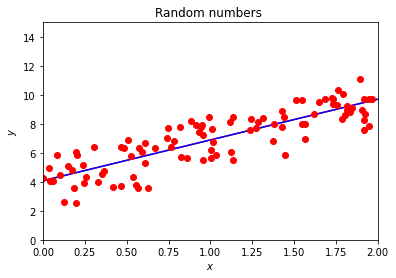

In [96]:
# Importing various packages
from math import exp, sqrt
from random import random, seed
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor

m = 100
x = 2*np.random.rand(m,1)
y = 4+3*x+np.random.randn(m,1)

X = np.c_[np.ones((m,1)), x]
theta_linreg = np.linalg.inv(X.T @ X) @ (X.T @ y)
print("\n Own inversion:")
print(theta_linreg)
sgdreg = SGDRegressor(max_iter = 50, penalty=None, eta0=0.1)
sgdreg.fit(x,y.ravel())
print("\n sgdreg from scikit:")
print(sgdreg.intercept_, sgdreg.coef_)


theta = np.random.randn(2,1)
eta = 0.1
Niterations = 1000


for iter in range(Niterations):
    gradients = 2.0/m*X.T @ ((X @ theta)-y)
    theta -= eta*gradients
print("\n theta from own gd:")
print(theta)

xnew = np.array([[0],[2]])
Xnew = np.c_[np.ones((2,1)), xnew]
ypredict = Xnew.dot(theta)
ypredict2 = Xnew.dot(theta_linreg)


n_epochs = 50
t0, t1 = 5, 50
def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T @ ((xi @ theta)-yi)
        eta = learning_schedule(epoch*m+i)
        theta = theta - eta*gradients
print("\n theta from own sdg:")
print(theta)

plt.plot(xnew, ypredict, "r-")
plt.plot(xnew, ypredict2, "b-")
plt.plot(x, y ,'ro')
plt.axis([0,2.0,0, 15.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Random numbers ')
plt.show()

**Challenge**: try to write a similar code for a Logistic Regression case.

---

# Esercizio sulla discesa del gradiente stocatica

Gli esempi visti sopra danno una buona dimostrazione di come la discesa del gradiente e la sua versione stocastica possono essere usati per allenare un modello di regressione lineare. Gli esempi funzionano molto bene...  soprattutto perché la regressione lineare ha una funzone di costo convessa con un minimo globale, per la quale anche la normale discesa del gradiente è garantita di trovare il minimo.

In questo esercizio vi si chiede di applicare i metodi di minimizzazione visti sopra ad una funzione molto più complicata, con svariati minimi locali. La discesa del gradiente standard rimane quasi sempre intrappolata in un minimo locale. La domanda a cui rispondere è: quanto meglio si può fare con un approccio stocastico?

Consideriamo la seguante funzione di due variabili:

$$
 f(x,y) = a(x^2 + y^2) + \cos(x) \, \sin(y- \frac \pi 2)
$$

con $a=0.03$. Il primo termine ha un minimo globale a $x$=$y$=0  mentre il secondo produce oscillazioni periodiche lungo entrabi gli assi ma è traslato in modo che uno dei suoi minimi locali coincide col minimo del primo termine. Il risultato è una funzione con un _minimo globale_ circondato da una _griglia di minimi locali_ disposti a schacchiera.

Il codice seguente mostra il comportamento di $f(x,y)$.

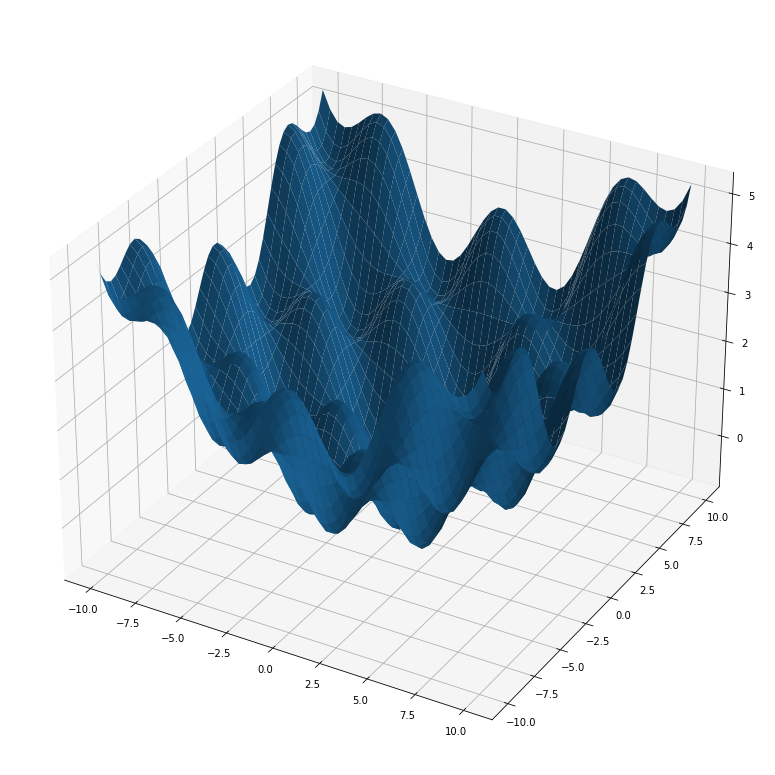

In [9]:
%matplotlib inline

import numpy as np
import numpy.linalg as la

import scipy.optimize as sopt

import matplotlib.pyplot as pt
from mpl_toolkits.mplot3d import axes3d

def f(x):
    #return np.cos(.4*x[0])*np.sin(.4*x[1]-3.14/2.) -np.sin(np.sqrt(x[0]**2 + x[1]**2))/((x[0]**2 + x[1]**2)**.5)
    #return .001*x[0]**2 -np.sin(np.sqrt(x[0]**2 + x[1]**2))/((x[0]**2 + x[1]**2)**.5)
    return np.cos(x[0])*np.sin(x[1]-3.14/2.) + 0.03*(x[0]**2 + x[1]**2)



def df(x):
    return np.array([x[0], 5*x[1]])

fig = pt.figure(figsize=(16,14))
ax = pt.axes(projection="3d") 

xmesh, ymesh = np.mgrid[-10:10:50j,-10:10:50j]
fmesh = f(np.array([xmesh, ymesh]))
ax.plot_surface(xmesh, ymesh, fmesh)


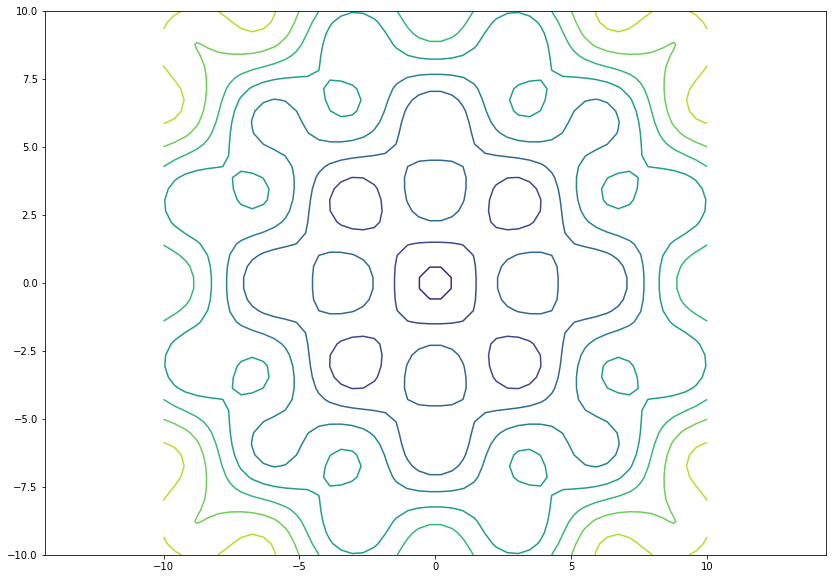

In [18]:
pt.figure(figsize=(14,10))
pt.axis("equal")
pt.contour(xmesh, ymesh, fmesh)

Il gradiente di $f(x,y)$ è dato da:

$$
 {\bf g}(x,y) = \nabla f(x,y) =  \begin{bmatrix}
   2ax - \sin(x) \, \sin(y- \frac \pi 2) \\
   2ay + \cos(x) \, \cos(y- \frac \pi 2)
   \end{bmatrix}
$$

In ML La discesa stocastica viene implementata calcolando di volta in volta un gradiente su un minibach di pochi dati (o addirittura, un solo dato) di campionamento. Come visto a lezione, essendo questo un campionamento parziale, equivale ad introdurre un errore stocastico sul gradiente. Nell'esercizio, simuleremo quesrta situazione aggiungendo un errore statistico tratto da una distribuzione normale (gaussiana) a media nulla:

$$
 {\bf g}_{SDG}(x,y) =  {\bf g}(x,y) + \cal {N}^2(0,\sigma)= \begin{bmatrix}
   2ax - \sin(x) \, \sin(y- \frac \pi 2) +  \cal {N}(0,\sigma)\\
   2ay + \cos(x) \, \cos(y- \frac \pi 2) +  \cal {N}(0,\sigma)
   \end{bmatrix}
$$

dove si può iniziare sceglendo una varianza unitaria, $\sigma^2=1$, perché viene riscalata dalla velocità di apprendimento. 

La velocità di apprendimento alla k-esima iterazione viene aggiornata come

$$\gamma_k = \frac{\gamma_0}{1+ c k} \, , $$

dove $\gamma_0$ e $c$ sono parametri da ottimizzare empiricamente.

**L'esercizio richiede di studiare i punti seguenti:**

+ Implementare un algoritmo di GD sia con passo fisso $\gamma_{GD}$ che con minimizzazione lineare. 
+ Generare un grafico della traiettoria di convergenza in alcuni casi. Si veda come varia rispetto alla velocita di apprendimento $\gamma_{GD}$.
+ Implementare l'algoritmo di SGD, usando una velocità di apprendimento via via più piccola come dall'equazione sopra.
+ Diseganre alcune traiettorie ed il valore della funzione in funzione delle iterazioni.
+ Per un punto di partenza fisso, qual'è la parcentuale ci successo per il SGD?



-- --

## Metodi di ottimizzazione della velocità di apprendimento e delle iterazioni

### Metodo del momenti (Momentum based GD)

Nella discesa stocastica del gradiente (SDG) si usa molto spesso un termine di *momento*
al fine di dare una inerzia al percorso di ottimizzazione nello spazio dei parametri.
In sostanza si tiene memoeria della direzione in cui ci si ta muovendo al fine di minimizzare
eventuali `sbandate' se ci sono delle fluttuazioni improvvise del gradiente
tra passi successivi.

Una implementazione tipica è la seguente:

$$
\mathbf{v}_{t}=\gamma \mathbf{v}_{t-1}-\eta_{t}\nabla_\theta E(\boldsymbol{\theta}_t) \nonumber
$$

<!-- Equation labels as ordinary links -->
<div id="_auto1"></div>

$$
\begin{equation} 
\boldsymbol{\theta}_{t+1}= \boldsymbol{\theta}_t +\mathbf{v}_{t},
\label{_auto1} \tag{1}
\end{equation}
$$



dove abbiamo introdotto un parametro di momento (o ti _inerzia_) $\gamma$, con
$0\le\gamma\le 1$, e rimane sotto inteso che il gradiente è calcolato 
ad ogni passo su un solo campionamento (in caso di SDG puro) oppure
su un mini-batch (per mb-SDG).
Questo algoritmo viene chiamato _gradient descent with momentum
(GDM)_. 
Dall'equazione sopra si vede che la velocità nello spazio dei
paramteri, $\mathbf{v}_t$ è una media aggiornata degli ultimi gradienti 
incontrati mentre 
$(1-\gamma)^{-1}$ può essere interpretata come una scala temporale caratterisitca
e quindi controlla la durata della 'memoria' per il calcolo della media.
Ovviamente, quando $\gamma=0$ l'algoritmo si riduce al semplice SGD già discusso.

In maniera equivalente, gli aggiornamenti possono anche essere scritti in funzione del passo:

$$
\Delta \boldsymbol{\theta}_{t+1} = \gamma \Delta \boldsymbol{\theta}_t -\ \eta_{t}\nabla_\theta E(\boldsymbol{\theta}_t),
$$

dove $\Delta \boldsymbol{\theta}_{t}\equiv \boldsymbol{\theta}_t-\boldsymbol{\theta}_{t-1}$.



#### Più dettagli sul metodo del momento

Le equazioni appena discusse possono essere spiegate più intuitivamente con un 
analogo di meccanica.
Consideriamo una particella si massa $m$ che si muove in un mezzo viscoso
con coefficiente di attrito dinamico $\mu$ ed con una energia potenziale
$E(\mathbf{w})$. Se indichiamo il vettore posizione della particella con $\mathbf{w}$,
abbiamo:


$$
m {d^2 \mathbf{w} \over dt^2} + \mu {d \mathbf{w} \over dt }= -\nabla_w E(\mathbf{w}).
$$

Discretizziamo le derivate su un intervallo di tempo $ \Delta t$,

$$
m { \mathbf{w}_{t+\Delta t}-2 \mathbf{w}_{t} +\mathbf{w}_{t-\Delta t} \over (\Delta t)^2}+\mu {\mathbf{w}_{t+\Delta t}- \mathbf{w}_{t} \over \Delta t} = -\nabla_w E(\mathbf{w}) ,
$$

E riarrangiamo l'equazione come:

$$
\Delta \mathbf{w}_{t +\Delta t}= - { (\Delta t)^2 \over m +\mu \Delta t} \nabla_w E(\mathbf{w})+ {m \over m +\mu \Delta t} \Delta \mathbf{w}_t.
$$

#### Parametro del momento

L'ultima equazione è identica a quella del metodo GDM se identifichiamo
la posisione della particlella, $\mathbf{w}$, come la posizione nello
soazio dei parametri $\boldsymbol{\theta}$.
Questo ci permette di relazionare il parametro di momento e la velocità
di apprendimento alla massa della particella ed al coefficienti di attrito:

$$
\gamma= {m \over m +\mu \Delta t }, \qquad \eta = {(\Delta t)^2 \over m +\mu \Delta t}.
$$

Il parametro di 'momento' $\gamma$ tende a zero nel limite in cui la massa
è trascurabile e l'attirto viscoso è dominante, mentre $\gamma\rightarrow1$
per $m\gg\mu\Delta t$. Quindi $\gamma$ misura l'importanta del temrine di
inerzia e la SGD standard (i.e., senza temrina di momento) corrisponde al
moto in un mezzo infinitamente viscoso.

_Perché il termine dimometo è utile?_ 
GDM aiuta il metodo do SGD a prendere più velocità nelle direzoni in 
cui il i gradienti sono piccoli ma persistenti anche in presenza di
fluttuazioni stocastiche, menter al tempo stesso sopprime le oscillazioni
in direzioni con grandi curvature.
Questo diventa particloarmente importante in situazioni in cui al superficie
da minimizzare e poco profinda o piatta in alcune direzione mentre prasenta
dei brevi tratti ripidi in altre direzioni.
In certi casi metodi al primo ordine (ovvero lineari nel momento) possono 
funzionare efficientemente e al pari di metodi più costi al secondo ordine,
con scelte appropriate delle condizioni iniziali. Si ritiene che questo sia
il caso per modelli di apprendimento molto complessi e profondi.




I vantaggi del metodo del momento sono a volte amplificati usando una
semplice variante dell'alcoritmo classico denominata _Nesterov Accelerated Gradient (NAG)_:



In NAG , invece di calcolare passo successivo usando i parametri correnti, $\nabla_\theta E(\boldsymbol{\theta}_t)$, 
si valuta il gradiente al punto in cui ci si aspetterebb di arrivera dato 
il valore corrente del momento, $\nabla_\theta E(\boldsymbol{\theta}_t +\gamma
\mathbf{v}_{t-1})$. Quindi, la regola di aggiornamento NAG diventa


In the NAG algorithm, rather than calculating the gradient at the
current parameters, $\nabla_\theta E(\boldsymbol{\theta}_t)$, one
calculates the gradient at the expected value of the parameters given
our current momentum, $\nabla_\theta E(\boldsymbol{\theta}_t +\gamma
\mathbf{v}_{t-1})$. This yields the NAG update rule

$$
\mathbf{v}_{t}=\gamma \mathbf{v}_{t-1}+\eta_{t}\nabla_\theta E(\boldsymbol{\theta}_t +\gamma \mathbf{v}_{t-1}) \nonumber
$$

<!-- Equation labels as ordinary links -->
<div id="_auto2"></div>

$$
\begin{equation} 
\boldsymbol{\theta}_{t+1}= \boldsymbol{\theta}_t -\mathbf{v}_{t}.
\label{_auto2} \tag{2}
\end{equation}
$$

Uno dei vantaggi maggiori di NAG è quello di permettere l'uso di velocità di apprendimento più grandi che per il GDM,a parità di scelta di $\gamma$.



## Momento di ordine due del gradiente

Nella discesa stocastica del gradiente, con e senza momento, rimane il 
problema di schegliere un procedimento per calibrare la velocità di
apprendimento $\eta_t$ con l'evolvere del tempo.
Come discusso in relazione al metodo ni Newton, queto presente alcune 
problematiche. La velocità di apprendimento (se isotropa in tutte le 
direzione di ${\bf \theta}$) deve essere limitata dalla curvatura nella
direzione più ripida, la quale può cambiare muovendosi nello spazio
dei parametri. Per aggirare il problema si potrebbe monitorare
la curvatura, facendo passi lunghi in direzioni ove si hanno avvallamenti
dolci o pianegginti e passi più corti in direzioni di curvatura maggiore.
I metodi al secondo ordine seguono questo approccio calcolando o approssimando
la matrice Hessiana e usandola per normalizzare la velocità di apprendimento.
Tuttavia quaesto approccio diventa computazionalmente costoso per sistemi 
di grandi dimensioni.
Idealmente, vorremmo essere in grado di cambiare la lunghezza del passo
ad ogni iterazione in funzione dell'andamento della superficie senza però
dover incorrere nei costi computazionali di calcolare o approssimare
l'Hessiana.

Alcuni approcci introdocci in gnegli anni recenti permettono di far ciò 
tenendo traccia non solo del gradiente (ovvero il
momento o velocità) ma anche del secondo momento di della distribuzione
del gradiente (ovvero il quadrato delle velocità). Alcuni di questi
metodi sono _AdaGrad_, _RMS-Prop_, e _ADAM_.


### AdaGrad

AdaGrad sta per "_adaptive gradient algorithm_". In breve mira a ridurre la velocità di apprendimento $\eta$ più velocemente nelle direzioni dello spazio dei parametri in cui i gradienti sono molto elevati, in modo da evitare instabilità, mentre la riduzione di $\eta$ è più lenta ove i gradienti sono piccoli e quindi dove è necessario fare passi più lunghi.
Se $${\bf g}_\tau \equiv \nabla E(\boldsymbol{\theta}_t)$$ è il gradiente allora si va a guardare la somma cumulativa dei quadrati dei gradienti in ogni direzzione

$$
 G_j = \sum_{\tau=1}^{t} {\bf g}_{\tau,i}
$$

dove $i$ indica la i-esima componente del vettore.
Ad ogni passo, i parametri del modello sono aggiornati in modo inversamente proporzionale alla norma $\ell_2$ dei gradienti:

$$
 \boldsymbol{\theta}_{t+1,i}=\boldsymbol{\theta}_{t,i} - \frac{\eta}{\sqrt{G_j + \epsilon}} \,{\bf g}_{\tau,i}  \qquad  \forall \;i \, .
$$

Il parametro $\eta$ rimane invariato durante tutto l'allenamento, tuttafiva viene ad aogni volta ridotto per la norma $\ell_2$ dei gradienti $\left(\sqrt{G_j} = \sqrt{\sum_{\tau=1}^{t} {\bf g}_{\tau,i}}\right)$ la quale aumenta ad ogni passo. Il punto cruciale è che la riduzione è calcolata indipendentemente per ogni direzione dello spazio dei parametri. Il parametro $\epsilon$ è scelto molto piccolo e serve ad evitare divisione per zero durante i primi passi.

Valori tipici sono $\eta\approx0.01$ e $\epsilon\approx10^{-8}$. 

### RMS prop

RMS prop sta per "Root Mean Square propagation". L'idea è quella di ridurre il passo in ogni direzione in maniera inversamente proporzionale alla velocità nello spazio dei parametri ma, invece di vare una somma cumulativa di tutti i gradienti precedenti, si considerano solo i passi più recenti. Invece di mantenre una media corrente del gradiente (come per il momento) consideriamo la media del quadrato delle velocità $\mathbf{s}_t=\mathbb{E}[\mathbf{g}_t^2]$ che è il memonto di ordine 2 della distribuzione.
La regola di aggiornamento per RMS prop è data da

<!-- Equation labels as ordinary links -->
<div id="_auto3"></div>

$$
\begin{equation}
\mathbf{g}_t = \nabla_\theta E(\boldsymbol{\theta}) 
\label{_auto3} \tag{3}
\end{equation}
$$

$$
\mathbf{s}_t =\beta \mathbf{s}_{t-1} +(1-\beta)\mathbf{g}_t^2 \nonumber
$$

$$
\boldsymbol{\theta}_{t+1}=\boldsymbol{\theta}_t - \eta_t { \mathbf{g}_t \over \sqrt{\mathbf{s}_t +\epsilon}}, \nonumber
$$

dove $\beta$ controlla l'intervallo di 'tempo' su cui si calcola la media corrente e tipicamente a valori intorno a $\beta=0.9$, $\eta_t$ è la velocità di apprendimento con valori dell'ordine di $10^{-3}$, e $\epsilon\sim 10^{-8} $ è una piccola costante di regolarizzazione usata per prevenire divergenze.

Come per *AdaGrad*,  le moltiplicazioni e divisioni per i vettori descritte sopre _sono intese fatte indipendentemente elemento per elemento_.
 Chiaramente la velocità di apprendimento viene ridotta in direzioni dove il gradiente è consistentemente grande. Questo accelera notevolmente la convergenza ad un minimo, permettendo di usare velocità di apprendimento $\eta$ molto più grandi in direzioni in cui la superficie è particolarmente piatta.



## Ottimizzazione ADAM 

L'algoritmo di ADAM (_Adaptative Moment Estimation_) combina i vantaggi del metodo del *momento* e di *RMSProp*.
In ADAM si mantiene una medie corrente sia del primo che del secondo momenti del gradiente (ovvero la velocità nello psazio dei paramtri ed il suo quadrato) e si usano queste informazioni per adattare la velocità di apprendimento indipendente mente per ogni parametro.
Oltra a mantenere la media corrente delle componenti del gragiente e dei loro quadrati (ovvero, $\mathbf{m}_t=\mathbb{E}[\mathbf{g}_t]$ e $\mathbf{s}_t=\mathbb{E}[\mathbf{g}^2_t]$), ADAM
fa delle correzioni di bias per tenere in conto il fatto che si stanno stimando questi valori usando una media corrente (i valori corretti sono indicati con un cappuccio qui sotto).

Le regole di aggiornamento di ADAM sono le seguanti (dove ancora una volta è sottointeso che si applicano separatemente ai vari elementi di ciascun vettore):

<!-- Equation labels as ordinary links -->
<div id="_auto4"></div>

$$
\begin{equation}
\mathbf{g}_t = \nabla_\theta E(\boldsymbol{\theta}) 
\label{_auto4} \tag{4}
\end{equation}
$$

$$
\mathbf{m}_t = \beta_1 \mathbf{m}_{t-1} + (1-\beta_1) \mathbf{g}_t \nonumber
$$

$$
\mathbf{s}_t =\beta_2 \mathbf{s}_{t-1} +(1-\beta_2)\mathbf{g}_t^2 \nonumber
$$

$$
\hat{\boldsymbol{\mathbf{m}}}_t={\mathbf{m}_t \over 1-(\beta_1)^t} \nonumber
$$

$$
\hat{\boldsymbol{\mathbf{s}}}_t ={\mathbf{s}_t \over1-(\beta_2)^t} \nonumber
$$

$$
\boldsymbol{\theta}_{t+1}=\boldsymbol{\theta}_t - \eta_t { \hat{\boldsymbol{\mathbf{m}}}_t \over \sqrt{\hat{\boldsymbol{\mathbf{s}}}_t} +\epsilon}, \nonumber
$$

dobe $\beta_1$ e $\beta_2$ contrillano la scale temporali su cui si calcolano
le medie correnti del primo e secondo momento del gradiente e hanno tipocamente
valori vicini a $0.9$ e $0.99$, rispettivamente. La $\eta$ e $\epsilon$ sono identiche a RMSprop.

Come per RMSprop, la lunghezza effettiva del passodipende dalla grandezza del
gradiente al quadrato. Per vedere questo punto più in dettaglio, riscriviamo questo
termine in funzione della varianza
$\boldsymbol{\sigma}_t^2 = \boldsymbol{\mathbf{s}}_t -
(\boldsymbol{\mathbf{m}}_t)^2$. Preso un parametro $\theta_t$, la regola di aggiornamento diventa:

$$
\Delta \theta_{t+1}= -\eta_t { \boldsymbol{m}_t \over \sqrt{\sigma_t^2 +  m_t^2 }+\epsilon}.
$$

## Consigli pratici

* **Mescolare il dataser quando si creano i mini-batch**. È molto importante rimesolare casualmente l'ordine del set di dati quando si creano dei mini-batche. In caso contrario, la discesa del gradiente potrebbe ottimizzare correlazioni spurie dovute all'ordine in cui i dati sono stati presentei (o campionati).

* **Trasformare i dati di input**. L'ottimizzazione diventa difficile quando la superficie presenta un misto di direzioni con andamenti ripidi e quasi piatti. Un trucco semplice per limitare situazioni simili è quello di standarizzare in dati sonntraendone la loro media e normalizzando la varianza delle variabili in input. Quando è possibile, si dovrebbero rimuovere anche le correlazioni tra i dti ininput. Questo punto può essere compreso semplicemente considerando il caso della regrassione lineare: nel caso di una funzione di costo ai minimi quadreati, si può vedere che la matrice hessiana è data semplicemente dalla matrice di correlazione tra gli input. Quindi, standarizzando le variabili in ingresso si impone che la superficie appaia omogenea in tutt le direzione dello spazio dei parametri. Poiché la maggior parte delle reti neurali profone può essere vista come una serie di trasformazioni lineari (seguite da una non linearità) ad ogni strato, ci si può aspettare che questa spiegazione intuitiva si applichi bene anche a casi più complessi di quello puramente lineare.

* **Monitorare l'andamento sui dati non inclusi nell'allenamento.** Bisogna sempre monitorare l'efficienza del modello un un set di validazione (una piccola porzione dei dati di allenamento che vengono esclusi dal processo di ottimizzazione e usati coem surrogato del dataset di test). Se l'errore di validazione incomincia ad aumentare vuold dire che il modello sta andando in overfitting e quindi il processo di ottimizzazione va terminato. Questo approccio è chiamato *early stopping* e in molti casi migliora notevolmente la performace.

* **Metodi di ottimizzazione adattativi non hanno sempre generalizzazioni efficienti.** Studi recenti hano mostrato che metodi adattativi come ADAM, RMSPorp, e AdaGrad se generalizzati tendono a funzionare peggio dei semplici SGD o SGD col momento, particolarmente nel limite di molte dimensioni (ovvero quando il numero di parametri eccede quello dei dati). Sebbene non sia ancora chiaro perché questi metodi siano così efficienti nell'allenare reti neurali prefonde, procedimenti semplici come un SGD ben calibrato può funzionare altrettanto bene (o meglio) in applicazioni di questo tipo.

Il testo di Geron, al capitolo 11, presenta molte discussioni interessamnti sull'argomento.

L'articolo di [Ruder (arXiv:1609.04747)](https://arxiv.org/abs/1609.04747v2)  dà una introduzione breve ma efficiente del metodo di SGD e delle strategie di ottimizzazione.


---
## Differenziazione automatica

La [differenziazione automatica](https://en.wikipedia.org/wiki/Automatic_differentiation) (_automatic differentiation_, AD),
nota anche come _differenziazione algoritmica_ o _differenziazione computazionale_, è un insieme di tecniche per il calcolo automatico delle derivate di una funzione matematica implementata da un programma informatico. AD, sfrutta il fatto che ogni programma di computer, semplice o complicato che sia, deve eseguire una serie di operazioni aritmetiche elementari (somme, sottrazioni, moltiplicazioni, divisioni, eccc...) o applica delle funzioni elementari (exp, log, sin, cos, etc.). 
Se si applia ripetutamente la regola a catena per la derivata delle funzioni di funzioni a questa sequenza di operazioni, è possibile calcolare automaticamente derivate di ordine arbitrario
I risultati sono accurati, alla precisione numerica della macchina, e usano al masssimo
un poche più operazioni aritmentiche del programma originale.

[Automatic differentiation (AD)](https://en.wikipedia.org/wiki/Automatic_differentiation), 
also called algorithmic
differentiation or computational differentiation,is a set of
techniques to numerically evaluate the derivative of a function
specified by a computer program. AD exploits the fact that every
computer program, no matter how complicated, executes a sequence of
elementary arithmetic operations (addition, subtraction,
multiplication, division, etc.) and elementary functions (exp, log,
sin, cos, etc.). By applying the chain rule repeatedly to these
operations, derivatives of arbitrary order can be computed
automatically, accurately to working precision, and using at most a
small constant factor more arithmetic operations than the original
program.

La differenziazione automatica non è:

* Differenziazione simbolica, né

* Differenziazione numerical (l'approssimazione alla differenze finite ).

La differenziazione simbolica può generare codici inefficienti e presente
difficoltà nel convertire un programma di computer in una espressione aritmetica.
La differenziazione numerica può introdurre errori di numerici dovuti alla
discretizazione e a cancellazioni.

Python ha strumenti per la **differenziazzione automatica**.
